# Examining the Sun-Huber dispersion function

In [1]:
## External modules.
from matplotlib import cm
from matplotlib.colors import BoundaryNorm
import matplotlib.pyplot as plt
import numpy as np
from os import path

## Internal modules.
from mml.utils import makedir_safe
from setup_dispersions import dispersion_huber, d1_huber, d2_huber
from setup_results import img_dir, my_fontsize, my_ext, export_legend

In [2]:
## Create directory to save figures.
makedir_safe(img_dir)

## Catoni-type bounds

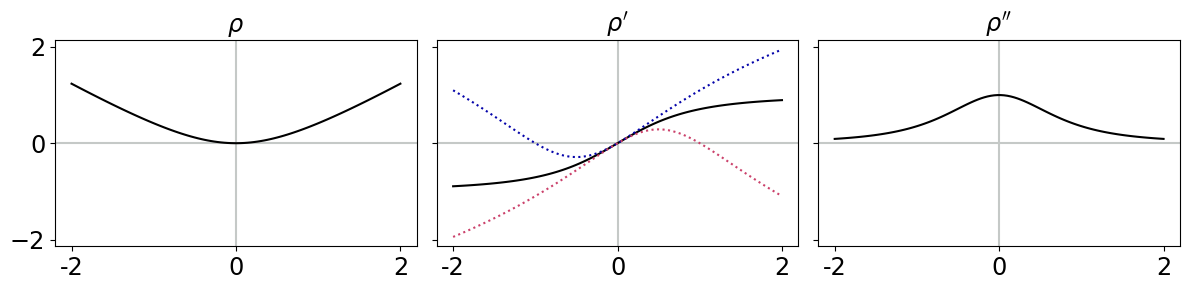

In [3]:
## Visualization of the underlying deviation function.

sigma = 1.0
width_factor = 2
catoni_factor = 1.0
factor_list = [-width_factor, 0, width_factor]

## Tick setup.
ticks = [ sigma*factor for factor in factor_list ]
tick_labels = [str(factor_list[0]),
               str(0), 
               str(factor_list[-1])]

## Computation and plotting.

fig, (ax_fn, ax_d1, ax_d2) = plt.subplots(1, 3, figsize=(12,3), sharey=True)

### Graph of dispersion function itself.
x_values = np.linspace(-width_factor*sigma, width_factor*sigma, 100)
ax_fn.axhline(y=0.0, color="xkcd:silver")
ax_fn.axvline(x=0.0, color="xkcd:silver")
y_values = dispersion_huber(x=x_values/sigma)
ax_fn.plot(x_values, y_values, color="xkcd:black", ls="-")
ax_fn.set_xticks(ticks)
ax_fn.set_xticklabels(tick_labels)
#ax_fn.set_yticks(ticks)
#ax_fn.set_yticklabels(tick_labels)
ax_fn.tick_params(labelsize=my_fontsize)
#ax_fn.set_ylim(bottom=-2*width_factor*sigma, top=2*width_factor*sigma)
ax_fn.set_title(r"$\rho$", size=my_fontsize)

### Graph of first derivative of dispersion function (+ Catoni-type bounding functions).
x_values = np.linspace(-width_factor*sigma, width_factor*sigma, 100)
ax_d1.axhline(y=0.0, color="xkcd:silver")
ax_d1.axvline(x=0.0, color="xkcd:silver")
y_values = d1_huber(x=x_values)
catoni_upper = np.log1p(x_values+catoni_factor*x_values**2)
catoni_lower = -np.log1p(catoni_factor*x_values**2-x_values)
ax_d1.plot(x_values, y_values, color="xkcd:black", ls="-")
ax_d1.plot(x_values, catoni_upper, color="xkcd:royal blue", ls="dotted")
ax_d1.plot(x_values, catoni_lower, color="xkcd:dark pink", ls="dotted")
ax_d1.set_xticks(ticks)
ax_d1.set_xticklabels(tick_labels)
ax_d1.tick_params(labelsize=my_fontsize)
ax_d1.set_title(r"$\rho^{\prime}$", size=my_fontsize)

### Graph of second derivative of dispersion function.
x_values = np.linspace(-width_factor*sigma, width_factor*sigma, 100)
ax_d2.axhline(y=0.0, color="xkcd:silver")
ax_d2.axvline(x=0.0, color="xkcd:silver")
y_values = d2_huber(x=x_values)
ax_d2.plot(x_values, y_values, color="xkcd:black", ls="-")
ax_d2.set_xticks(ticks)
ax_d2.set_xticklabels(tick_labels)
ax_d2.tick_params(labelsize=my_fontsize)
ax_d2.set_title(r"$\rho^{\prime\prime}$", size=my_fontsize)

plt.tight_layout()
fname = path.join(img_dir, "huber_disp.{}".format(my_ext))
plt.savefig(fname=fname)
plt.show()

___

## Approximation of quadratic function

In [4]:
## Functions used in computing dispersions.

def dispersion_pseudohuber(x, sigma):
    '''
    The typical smooth Huber function.
    '''
    return sigma * np.sqrt(x**2 + sigma**2) - sigma**2


In [5]:
## Risk parameters up for investigation here.
pseudohuber_todo = np.linspace(0.1, 2.0, 25)

## Colour setup.
pseudohuber_cmap = cm.get_cmap("inferno")
pseudohuber_colours = []
for i in range(len(pseudohuber_todo)):
    pseudohuber_colours += [pseudohuber_cmap(i/len(pseudohuber_todo))]

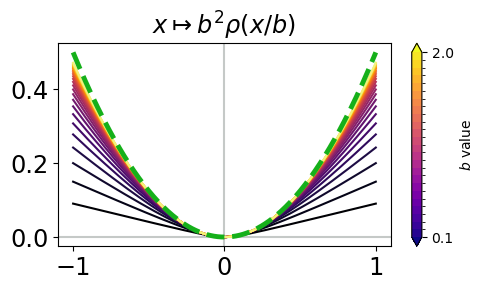

In [6]:
## Compute and visualize.

x_values = np.linspace(-1.0, 1.0, 250)

fig, ax = plt.subplots(1, 1, figsize=(5,3))

ax.axhline(y=0.0, color="xkcd:silver")
ax.axvline(x=0.0, color="xkcd:silver")

for i, sigma in enumerate(pseudohuber_todo):
    y_values = dispersion_pseudohuber(x=x_values, sigma=sigma)
    ax.plot(x_values, y_values, color=pseudohuber_colours[i], ls="solid")
    ax.set_title(r"$x \mapsto b^{2}\rho(x/b)$", size=my_fontsize)
ax.plot(x_values, x_values**2/2, color="xkcd:green", ls="dashed", linewidth=3.5)

## Colorbar.
bounds = pseudohuber_todo
cmap = cm.get_cmap("inferno")
norm = BoundaryNorm(bounds, cmap.N, extend="both")
cbar = fig.colorbar(cm.ScalarMappable(norm=norm, cmap=cm.get_cmap("plasma")),
                    ax=ax, label=r"$b$ value")
#cbar.ax.tick_params(labelsize=my_fontsize)
cbar.set_ticks([bounds.min(), bounds.max()])
cbar.set_ticklabels([str(bounds.min()), str(bounds.max())])

ax.tick_params(labelsize=my_fontsize)
plt.tight_layout()
fname = path.join(img_dir, "pseudohuber.{}".format(my_ext))
plt.savefig(fname=fname)
plt.show()

## Legendre transform

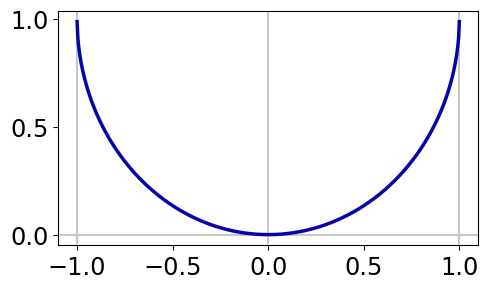

In [7]:
## Compute the Legendre transform of Sun-Huber rho function.

def rho_legendre(x):
    '''
    Defined only for 0 <= abs(x) < 1.
    '''
    xsq = x**2
    return xsq / np.sqrt(1.0-xsq) + 1.0 - 1.0/np.sqrt(1.0-xsq)


def rho_diff(x, c):
    '''
    '''
    return c*x - np.sqrt(x**2+1) + 1


x_values = np.linspace(-0.9999, 0.9999, 500)
y_values = rho_legendre(x=x_values)
#x_values = np.linspace(-10, 1000, 500)
#y_values = rho_diff(x=x_values, c=0.9999)

fig, ax = plt.subplots(1, 1, figsize=(5,3))

ax.axhline(y=0.0, color="xkcd:silver")
ax.axvline(x=0.0, color="xkcd:silver")
ax.axvline(x=1.0, color="xkcd:silver")
ax.axvline(x=-1.0, color="xkcd:silver")

ax.plot(x_values, y_values, color="xkcd:royal blue", ls="solid", linewidth=2.5)
ax.tick_params(labelsize=my_fontsize)
plt.tight_layout()
fname = path.join(img_dir, "rho_legendre.{}".format(my_ext))
plt.savefig(fname=fname)
plt.show()

___